In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Access this data using the Thinkful database using these credentials:

* postgres_user = 'dsbc_student'
* postgres_pw = '7*.8G9QH21'
* postgres_host = '142.93.121.174'
* postgres_port = '5432'
* postgres_db = 'useducation'

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? 4. If so, eliminate them using the technique you think most suitable.
5. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
6. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
7. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
fill_list = ["STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

## 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

In [4]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 209 to 1249
Data columns (total 25 columns):
PRIMARY_KEY                     415 non-null object
STATE                           415 non-null object
YEAR                            415 non-null int64
ENROLL                          415 non-null float64
TOTAL_REVENUE                   415 non-null float64
FEDERAL_REVENUE                 415 non-null float64
STATE_REVENUE                   415 non-null float64
LOCAL_REVENUE                   415 non-null float64
TOTAL_EXPENDITURE               415 non-null float64
INSTRUCTION_EXPENDITURE         415 non-null float64
SUPPORT_SERVICES_EXPENDITURE    415 non-null float64
OTHER_EXPENDITURE               415 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      415 non-null float64
GRADES_PK_G                     415 non-null float64
GRADES_KG_G                     415 non-null float64
GRADES_4_G                      415 non-null float64
GRADES_8_G                      415 non-null flo

In [5]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52524.0,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154


__Time series data, I can interpolate the missing values__

Z-Score Test

In [8]:
from scipy.stats import zscore

z_scores = zscore(education_df['TOTAL_REVENUE'])
for threshold in range(1,10):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  26,  52,  61,  89, 100, 112, 140, 151, 163, 168, 172, 189,
       191, 197, 202, 214, 220, 224, 241, 243, 249, 254, 266, 271, 275,
       292, 294, 300, 305, 317, 322, 326, 343, 345, 351, 356, 368, 373,
       377, 394, 396, 399, 402, 407], dtype=int64),)
Number of outliers is: 45
The score threshold is: 2
The indices of the outliers:
(array([ 26,  61,  89, 112, 140, 151, 163, 191, 202, 214, 243, 254, 266,
       294, 305, 317, 345, 356, 368, 396, 407], dtype=int64),)
Number of outliers is: 21
The score threshold is: 3
The indices of the outliers:
(array([ 61, 112, 163, 191, 214, 243, 266, 294, 305, 317, 345, 356, 368,
       396, 407], dtype=int64),)
Number of outliers is: 15
The score threshold is: 4
The indices of the outliers:
(array([163, 214, 266, 317, 368, 396], dtype=int64),)
Number of outliers is: 6
The score threshold is: 5
The indices of the outliers:
(array([368], dtype=int64),)
Number of outliers is: 1
Th

In [10]:
z_scores = zscore(education_df['TOTAL_EXPENDITURE'])
for threshold in range(1,10):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  26,  52,  61,  89, 100, 112, 140, 151, 163, 168, 189, 191,
       197, 202, 214, 220, 224, 241, 243, 249, 254, 266, 271, 275, 292,
       294, 300, 305, 317, 322, 326, 343, 345, 351, 356, 368, 373, 377,
       394, 396, 402, 407], dtype=int64),)
Number of outliers is: 43
The score threshold is: 2
The indices of the outliers:
(array([ 26,  61,  89, 100, 112, 140, 151, 163, 191, 202, 214, 243, 254,
       266, 294, 305, 317, 345, 356, 368, 396, 407], dtype=int64),)
Number of outliers is: 22
The score threshold is: 3
The indices of the outliers:
(array([ 61, 112, 163, 191, 214, 243, 254, 266, 294, 305, 317, 345, 356,
       368, 396, 407], dtype=int64),)
Number of outliers is: 16
The score threshold is: 4
The indices of the outliers:
(array([112, 163, 214, 266, 317, 368, 396], dtype=int64),)
Number of outliers is: 7
The score threshold is: 5
The indices of the outliers:
(array([368], dtype=int64),)
Number of outliers is:

According to Zscores both have outliers

## 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [11]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

In [12]:
z_scores = zscore(winsorized_revenue)
for threshold in range(1,10):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  19,  26,  52,  61,  66,  70,  87,  89,  95, 100, 112, 117,
       121, 138, 140, 143, 146, 151, 163, 168, 172, 181, 189, 191, 194,
       197, 202, 214, 220, 224, 233, 241, 243, 246, 249, 254, 266, 271,
       275, 284, 292, 294, 297, 300, 305, 317, 322, 326, 343, 345, 348,
       351, 356, 368, 373, 377, 394, 396, 399, 402, 407], dtype=int64),)
Number of outliers is: 62
The score threshold is: 2
The indices of the outliers:
(array([  3,  26,  52,  61,  89, 100, 112, 140, 151, 163, 168, 191, 202,
       214, 243, 254, 266, 275, 294, 305, 317, 326, 345, 356, 368, 377,
       394, 396, 402, 407], dtype=int64),)
Number of outliers is: 30
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 5
The indices of the outliers:
(array([], dtype=int6

In [13]:
z_scores = zscore(winsorized_expenditure)
for threshold in range(1,10):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  19,  26,  52,  61,  66,  70,  87,  89,  95, 100, 112, 117,
       121, 130, 138, 140, 143, 146, 151, 163, 168, 172, 181, 189, 191,
       194, 197, 202, 214, 220, 224, 233, 241, 243, 246, 249, 254, 266,
       271, 275, 292, 294, 297, 300, 305, 317, 322, 326, 343, 345, 348,
       351, 356, 368, 373, 377, 394, 396, 399, 402, 407], dtype=int64),)
Number of outliers is: 62
The score threshold is: 2
The indices of the outliers:
(array([  3,  26,  52,  61,  89, 100, 112, 140, 151, 163, 168, 191, 202,
       214, 243, 254, 266, 294, 305, 317, 345, 356, 368, 377, 396, 407],
      dtype=int64),)
Number of outliers is: 26
The score threshold is: 3
The indices of the outliers:
(array([ 26,  61,  89, 112, 140, 151, 163, 191, 202, 214, 243, 254, 266,
       294, 305, 317, 345, 356, 368, 396, 407], dtype=int64),)
Number of outliers is: 21
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of o

After the outlier threshold of 3 (75%) we lose our outliers, Winsorization worked.

## 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? 

In [14]:
education_df['Deficit'] =  education_df['TOTAL_REVENUE'] - education_df['TOTAL_EXPENDITURE']

{'whiskers': [<matplotlib.lines.Line2D at 0x18a46b88908>,
 'caps': [<matplotlib.lines.Line2D at 0x18a46b88f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a46b88108>],
 'medians': [<matplotlib.lines.Line2D at 0x18a46b60608>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a46b8db08>],
 'means': []}

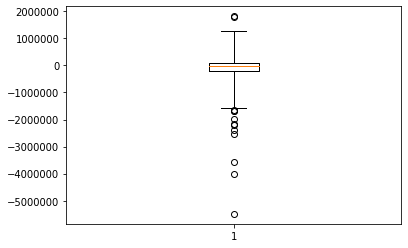

In [20]:
plt.boxplot(education_df['Deficit'], whis = 5)

appears so!

## 4. If so, eliminate them using the technique you think most suitable.

In [18]:
winsorized_budget = winsorize(education_df['Deficit'], (0.05, 0.05))

{'whiskers': [<matplotlib.lines.Line2D at 0x18a46bf67c8>,
 'caps': [<matplotlib.lines.Line2D at 0x18a46bf6e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a46beefc8>],
 'medians': [<matplotlib.lines.Line2D at 0x18a46bfadc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a46bfaec8>],
 'means': []}

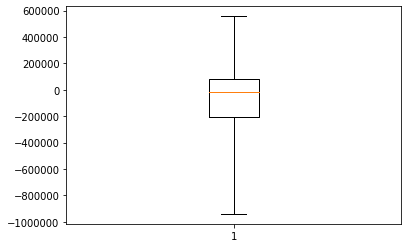

In [21]:
plt.boxplot(winsorized_budget, whis = 5)

Looks like outliers were taken care of

## 5. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [22]:
education_df['winsordeficit'] =  winsorized_revenue - winsorized_expenditure

{'whiskers': [<matplotlib.lines.Line2D at 0x18a46c77cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x18a46c77e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a46c77588>],
 'medians': [<matplotlib.lines.Line2D at 0x18a46c7ae48>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a46c7aec8>],
 'means': []}

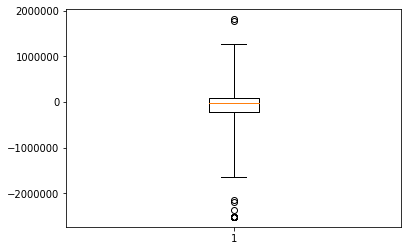

In [24]:
plt.boxplot(education_df['winsordeficit'], whis=5)

In [28]:
winsorizedbudget2 = winsorize(education_df['winsordeficit'], (0.05, 0.05))

{'whiskers': [<matplotlib.lines.Line2D at 0x18a46d7bb88>,
 'caps': [<matplotlib.lines.Line2D at 0x18a46d7bd08>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a46d7b3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x18a46d80d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x18a46d80d88>],
 'means': []}

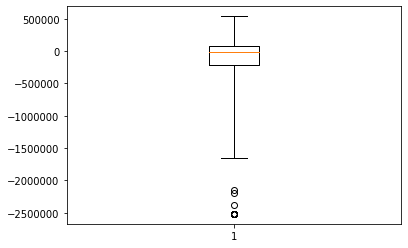

In [29]:
plt.boxplot(winsorizedbudget2, whis=5)

## 6. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [30]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,Deficit,winsordeficit
count,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,...,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,415.000000,415.000000,415.000000,415.000000,4.150000e+02,4.150000e+02
mean,2007.542169,9.435114e+05,1.050078e+07,9.452970e+05,4.861435e+06,4.694044e+06,1.060764e+07,5.483496e+06,3.099217e+06,4.805515e+05,...,64247.127711,5.827269e+05,2.858815e+05,8.910099e+05,236.627931,279.547505,219.313624,263.563558,-1.068615e+05,-1.655368e+05
std,5.263816,1.120863e+06,1.308047e+07,1.325607e+06,6.150820e+06,6.082528e+06,1.332400e+07,6.988600e+06,3.718716e+06,5.858813e+05,...,76734.979844,6.919342e+05,3.396827e+05,1.057819e+06,8.992015,9.599459,7.583719,6.935179,6.013278e+05,6.766118e+05
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102,-5.487742e+06,-2.518429e+06
25%,2003.000000,2.795105e+05,2.672062e+06,2.594065e+05,1.445588e+06,9.448265e+05,2.624235e+06,1.404482e+06,8.131670e+05,1.284545e+05,...,18536.500000,1.666610e+05,8.207900e+04,2.598385e+05,231.945184,274.367612,214.914848,259.312874,-2.043990e+05,-2.140815e+05
50%,2007.000000,6.651090e+05,6.077498e+06,5.353560e+05,2.966981e+06,2.385143e+06,6.184819e+06,3.168745e+06,1.872074e+06,3.239130e+05,...,41270.000000,4.058170e+05,1.866620e+05,6.249790e+05,238.292839,281.407120,220.829771,265.050858,-1.455000e+04,-1.575500e+04
75%,2011.000000,1.017251e+06,1.196548e+07,1.019472e+06,5.972396e+06,5.334070e+06,1.150164e+07,6.006730e+06,3.566994e+06,5.472210e+05,...,74850.500000,6.391890e+05,3.217070e+05,9.700250e+05,242.640565,286.086248,224.467909,268.199020,8.363100e+04,8.250600e+04
max,2015.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,277.191363,1.816932e+06,1.816932e+06


There are some pretty substantial differences between the two

## 7. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

for a more accurate representation, using the data from the original variables is best. The method in the 3rd question.